<a href="https://colab.research.google.com/github/wo1fie3608/BDA-Project/blob/main/knn_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Importing data directly from Google Drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Feature Selection (Gender to Male and Female Matrix)**

In [3]:
data=pd.read_csv('/content/drive/MyDrive/iphone_purchase_records.csv')
print(data)
gender_bin=pd.get_dummies(data["Gender"])
data=pd.concat((gender_bin, data),axis=1)
data=data.drop(["Gender"], axis=1)
print(data)

     Gender  Age  Salary  Purchase Iphone
0      Male   19   19000                0
1      Male   35   20000                0
2    Female   26   43000                0
3    Female   27   57000                0
4      Male   19   76000                0
..      ...  ...     ...              ...
395  Female   46   41000                1
396    Male   51   23000                1
397  Female   50   20000                1
398    Male   36   33000                0
399  Female   49   36000                1

[400 rows x 4 columns]
     Female  Male  Age  Salary  Purchase Iphone
0         0     1   19   19000                0
1         0     1   35   20000                0
2         1     0   26   43000                0
3         1     0   27   57000                0
4         0     1   19   76000                0
..      ...   ...  ...     ...              ...
395       1     0   46   41000                1
396       0     1   51   23000                1
397       1     0   50   20000          

**Data Splitting for Training and Testing**

---


**Feature Scaling**

In [4]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=128)
scale= StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)
X_train=pd.DataFrame(X_train)
X_test=pd.DataFrame(X_test)

**KNN algorithm hard coding (No inbuilt libraries used)**

In [5]:
def knearest(X_traint,X_testt,k,y_traint):
  X_traint=X_traint.to_numpy()
  X_testt=X_testt.to_numpy()
  euclidian_distance=(X_traint-X_testt)**2
  euclidian_distance=np.sum(euclidian_distance, axis = 1)**0.5
  temp=[]
  ind=0
  for i in euclidian_distance:
    temp.append([i,ind])
    ind=ind+1
  temp=np.array(temp)
  temp_sorted = temp[np.argsort(temp[:, 0])]
  zero=0
  one=0
  for i in range(k):
    if(y_traint.iloc[int(temp_sorted[i][1])]==0):
      zero=zero+1
    else:
      one=one+1
  if(one>zero):
    return 1
  else:
    return 0



**Training and selecting optimal K value using brute force and comparing performance**

In [6]:
k=1
accuracy=0
incorrectfinal=len(X_test)
recallfinal=0
precisionfinal=0
fscorefinal=0
comparision={}
for i in range(1,int(len(X_train)**0.5),2):
  correct=0
  tn=0
  fp=0
  fn=0
  tp=0
  for j in range(0,len(X_test)):
    predicted=knearest(X_train,X_test.iloc[j,:],i,y_train)
    if(y_test.iloc[j]==0):
      if(predicted==0):
        tn+=1
      else:
        fp+=1
    else:
      if(predicted==0):
        fn+=1
      else:
        tp+=1
    correct+=(predicted==y_test.iloc[j])
  incorrect=len(X_test)-correct
  correct=correct/len(X_test)
  comparision[i]={}
  comparision[i]['accuracy']=correct*100
  comparision[i]['precision']=tp*100/(tp+fp)
  comparision[i]['recall']=tp*100/(tp+fn)
  comparision[i]['F1 score']=2*(tp*100/(tp+fp))*(tp*100/(tp+fn))/((tp*100/(tp+fp))+(tp*100/(tp+fn)))
  comparision[i]['correct']=len(X_test)-incorrect
  comparision[i]['incorrect']=incorrect
  print('********')
  print("for k=",i," accuracy:",round(correct*100,2),"%"," precison:",round(tp*100/(tp+fp),2),"%"," recall:",round(tp*100/(tp+fn),2),"%"," F1 score:",round(2*(tp*100/(tp+fp))*(tp*100/(tp+fn))/((tp*100/(tp+fp))+(tp*100/(tp+fn))),2),"%",sep='')
  if(accuracy<correct):
    accuracy=correct
    k=i
    incorrectfinal=incorrect
    recallfinal=tp/(tp+fn)
    precisionfinal=tp/(tp+fp)
    fscorefinal=2*recallfinal*precisionfinal/(precisionfinal+recallfinal)
    
print('********')
print('\033[1m',"Optimal K value is:",k," with accuracy:",round(accuracy*100,2),"%"," and F1 score:",round(fscorefinal*100,2),'%','\033[0m',sep='')
print('********')

********
for k=1 accuracy:90.83% precison:91.89% recall:80.95% F1 score:86.08%
********
for k=3 accuracy:90.83% precison:89.74% recall:83.33% F1 score:86.42%
********
for k=5 accuracy:94.17% precison:92.68% recall:90.48% F1 score:91.57%
********
for k=7 accuracy:93.33% precison:92.5% recall:88.1% F1 score:90.24%
********
for k=9 accuracy:94.17% precison:92.68% recall:90.48% F1 score:91.57%
********
for k=11 accuracy:93.33% precison:90.48% recall:90.48% F1 score:90.48%
********
for k=13 accuracy:92.5% precison:90.24% recall:88.1% F1 score:89.16%
********
for k=15 accuracy:92.5% precison:90.24% recall:88.1% F1 score:89.16%
********
Optimal K value is:5 with accuracy:94.17% and F1 score:91.57%
********


**Storing performance of optimal K value in a dictionary for visual Data Visualization**

In [7]:
results={}
results["accuracy"]=round(accuracy*100,2)
results["precision"]=round(precisionfinal*100,2)
results["recall"]=round(recallfinal*100,2)
results["f1score"]=round(fscorefinal*100,2)

**Storing Accuracy of all K values in a dictionary for visual Data Visualization**

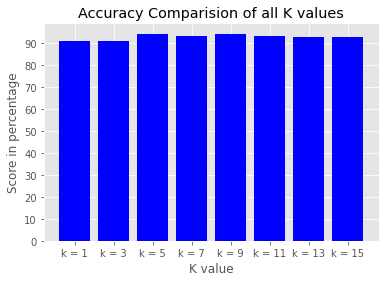

In [8]:
temp={} 
for i in range(1,int(len(X_train)**0.5),2):
  temp['k = '+str(i)]=comparision[i]['accuracy']
parameters = list(temp.keys())
values = list(temp.values())  
plt.style.use('ggplot')
plt.locator_params(axis="y", nbins=15)
plt.locator_params(axis="x", nbins=30)
plt.bar(parameters, values, color ='blue')
plt.xlabel("K value")
plt.ylabel("Score in percentage")
plt.title("Accuracy Comparision of all K values")
plt.show()

**Storing Precision of all K values in a dictionary for visual Data Visualization**

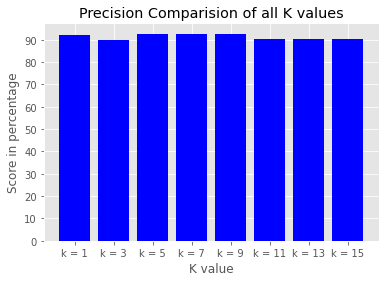

In [9]:
temp={} 
for i in range(1,int(len(X_train)**0.5),2):
  temp['k = '+str(i)]=comparision[i]['precision']
parameters = list(temp.keys())
values = list(temp.values())  
plt.style.use('ggplot')
plt.locator_params(axis="y", nbins=15)
plt.bar(parameters, values, color ='blue')
plt.xlabel("K value")
plt.ylabel("Score in percentage")
plt.title("Precision Comparision of all K values")
plt.show()

**Storing Recall of all K values in a dictionary for visual Data Visualization**

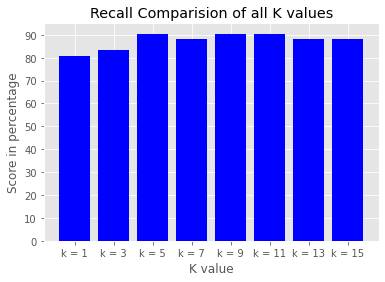

In [10]:
temp={} 
for i in range(1,int(len(X_train)**0.5),2):
  temp['k = '+str(i)]=comparision[i]['recall']
parameters = list(temp.keys())
values = list(temp.values())  
plt.style.use('ggplot')
plt.locator_params(axis="y", nbins=15)
plt.bar(parameters, values, color ='blue')
plt.xlabel("K value")
plt.ylabel("Score in percentage")
plt.title("Recall Comparision of all K values")
plt.show()

**Storing F1 Score of all K values in a dictionary for visual Data Visualization**

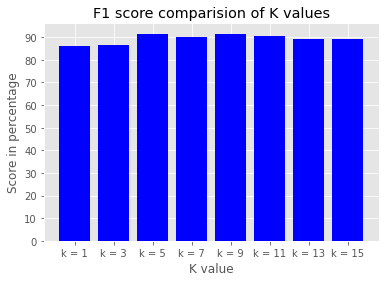

In [11]:
temp={} 
for i in range(1,int(len(X_train)**0.5),2):
  temp['k = '+str(i)]=comparision[i]['F1 score']
parameters = list(temp.keys())
values = list(temp.values())  
plt.style.use('ggplot')
plt.locator_params(axis="y", nbins=15)
plt.bar(parameters, values, color ='blue')
plt.xlabel("K value")
plt.ylabel("Score in percentage")
plt.title("F1 score comparision of K values")
plt.show()

**Storing Performance of optimal K value in a dictionary for visual Data Visualization using bar chart**

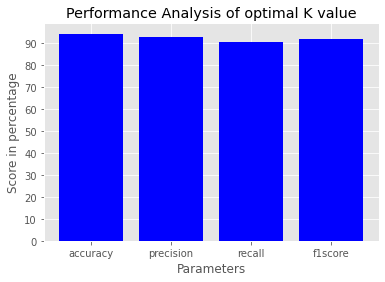

In [12]:
parameters = list(results.keys())
values = list(results.values())  
plt.style.use('ggplot')
plt.locator_params(axis="y", nbins=15)
plt.bar(parameters, values, color ='blue')
plt.xlabel("Parameters")
plt.ylabel("Score in percentage")
plt.title("Performance Analysis of optimal K value")
plt.show()

In [13]:
results['number of correct predictions']=len(X_test)-incorrectfinal
results["number of incorrect predictions"]=incorrectfinal

**Printing optimal K value results and performance**

In [14]:
for i in results:
  print('\033[1m',i+": ",results[i],'\033[0m',end='',sep='')
  if(i!='number of correct predictions' and i!='number of incorrect predictions'):
    print('\033[1m',"%",'\033[0m',)
  else:
    print()

accuracy: 94.17 % 
precision: 92.68 % 
recall: 90.48 % 
f1score: 91.57 % 
number of correct predictions: 113
number of incorrect predictions: 7
